## Homework 1: Applied Machine Learning

### Instructions

1) Please submit the .ipynb and .pdf file to Gradescope. ( File Name : AML_HW1_Solutions_(your_UNI).ipynb )

2) Please include your Name and UNI below.


### Name: Raksha Chandrashekar
### UNI:rc3729


This assignment covers material from the first three lectures, with a focus on the following topics:

1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [10]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

### **Part 1: Data Visualization and Analysis**

Understanding data characteristics and patterns is crucial for building effective models. In this part, we will visualize and analyze the `price.csv` dataset.

####**Diamond Dataset Description**

This dataset contains information on nearly 54,000 diamonds, including their prices and various attributes. It consists of 10 features, with 'price' as the target variable.

#####**Key Features:**

Carat: Diamond’s weight in metric carats.

Cut: Quality of the diamond’s cut (Fair, Good, Very Good, Premium, Ideal).

Color: Graded from J (worst) to D (best), representing the diamond’s colorlessness.

Clarity: Indicates inclusions/blemishes, from I1 (lowest) to IF (flawless).

Depth: Total depth percentage, representing the diamond’s height from the culet (bottom tip) to the table (top surface).

Table: Width of the diamond’s top (table) relative to its widest point.

x: Length in mm

y: Width in mm

z: Depth in mm

price: target variable


<b>Note: Remember to label plot axes while plotting.</b>

In [5]:
# Load the dataset

price_df = pd.read_csv('price.csv')
print(price_df)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


**1.1 Create a bar chart to compare the average diamond prices by cut and color.**


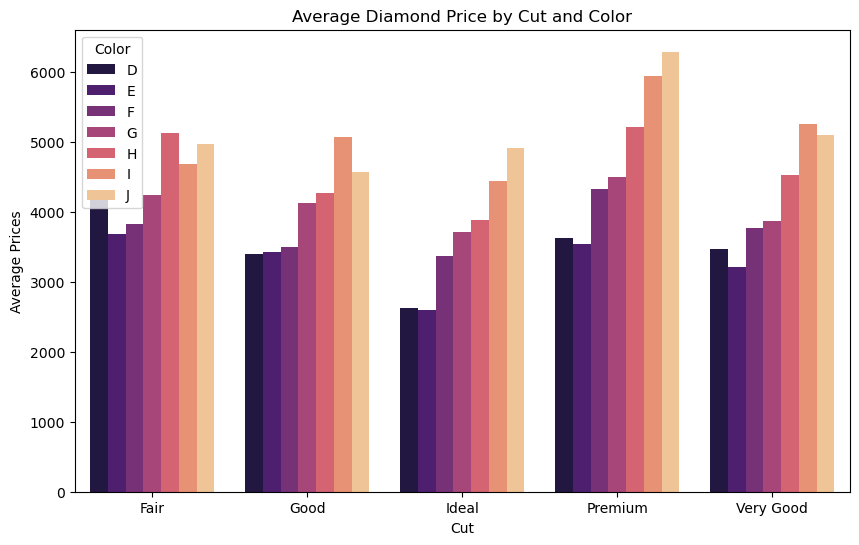

In [6]:
### Code here
average_price = price_df.groupby(['cut', 'color'])['price'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='cut', y='price', hue='color', data=average_price, palette='magma')
plt.xlabel('Cut')
plt.ylabel('Average Prices')
plt.title('Average Diamond Price by Cut and Color')
plt.legend(title='Color')
plt.show()

### Comment here
We can see that all the colors of Premium cut diamonds have a higher average price than the other types of cuts.


**1.2 Plot a small multiple of bar charts to visualize the data distribution for the following categorical variables:**
1. **cut**
2. **color**

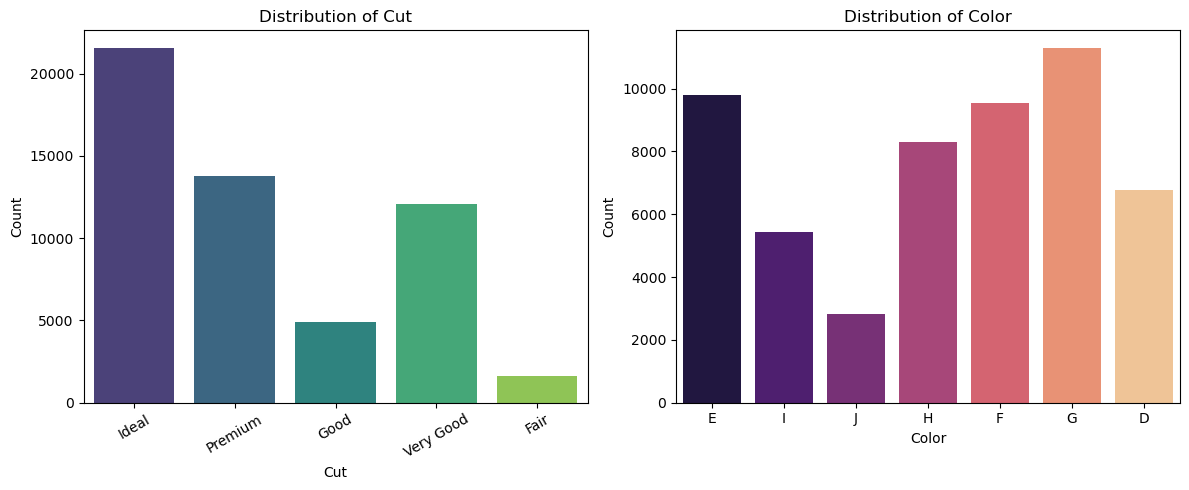

In [7]:
### Code here
figure, axes = plt.subplots(1,2, figsize=(12,5))
sns.countplot(x='cut', data=price_df, ax=axes[0], hue='cut', palette='viridis')
axes[0].set_title('Distribution of Cut')
axes[0].set_xlabel('Cut')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=30)

sns.countplot(x='color', data=price_df, ax=axes[1], hue='color', palette='magma')
axes[1].set_title('Distribution of Color')
axes[1].set_xlabel('Color')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**1.3 Plot relationships between features (x,y,table,depth) and the target variable `price` as a small multiple of scatter plots.**
1. x length
2. y length
3. table
4. depth
<b></b>

<Figure size 2000x800 with 0 Axes>

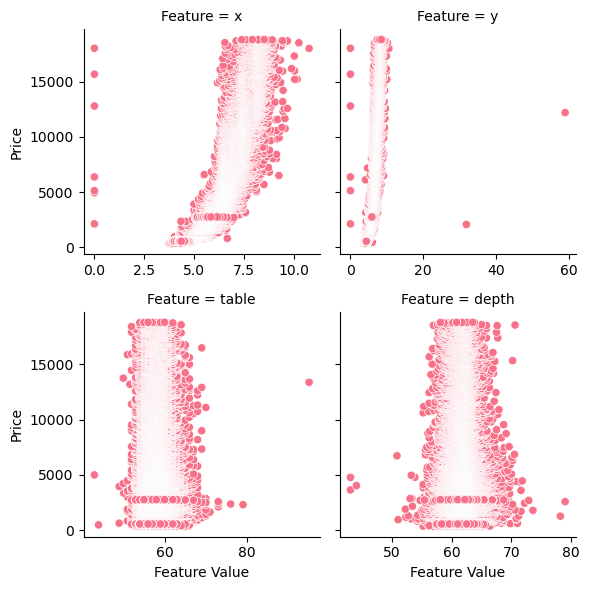

'plt.figure(figsize=(8,6))\nsns.scatterplot(x=price_df[\'table\'], y=price_df[\'price\'])\nplt.xlabel("X Length")\nplt.ylabel("Price")\nplt.title("Scatter Plot of X Length and Price")\nplt.show()'

In [8]:
### Code here
price_df_long = price_df.melt(id_vars=['price'], value_vars=['x', 'y', 'table', 'depth'], var_name='Feature', value_name='Value')
plt.figure(figsize=(20, 8))
g = sns.FacetGrid(price_df_long, col='Feature', col_wrap=2, sharex=False, sharey=True)
g.map_dataframe(sns.scatterplot, 'Value', 'price', hue='Feature', palette='husl')
g.set_axis_labels('Feature Value', 'Price')
plt.show()
'''plt.figure(figsize=(8,6))
sns.scatterplot(x=price_df['table'], y=price_df['price'])
plt.xlabel("X Length")
plt.ylabel("Price")
plt.title("Scatter Plot of X Length and Price")
plt.show()'''

**1.4 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**


### Comment here
From the scatter plots, one can see that linear regression might not be a good model for the problem. 
This is because:
1. There is a curve in the plots with features x, y, and depth which means there is some non-linearity
that linear regression might not capture accurately.
2. There are outliers in all the scatter plots. These outliers will affect the model and this might 
lead to mispredictions as it will affect the model's coefficients. 

## **Part 2: Linear Models for Regression and Classification**

In this section, we'll explore linear models, starting with **linear regression**.

**2.1 Linear Regression**

We will now proceed with splitting the dataset and implementing linear regression to predict the `price`.


In [9]:
# Split the dataset into features and labels
print(price_df)
print("\n-------------------\n")
price_X = price_df.drop(columns=['price'])
price_y = price_df['price']
print(price_X)
print(price_y)
print("Features shape:", price_X.shape)
print("Labels shape:", price_y.shape)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

-------------------

       carat        cut col

### **Data Preprocessing**

Before we can fit a linear regression model, several pre-processing steps should be applied to the dataset:

1. **Encode categorical features appropriately** (e.g., `cut`, `color`, `clarity`).
2. **Check for multicollinearity** by analyzing the correlation matrix and removing any highly collinear features.
3. **Split the dataset** into training (60%), validation (20%), and test (20%) sets.
4. **Standardize the feature matrices** (`X_train`, `X_val`, and `X_test`) to have zero mean and unit variance. Ensure that the standardization parameters (mean, variance) are learned from `X_train` and then applied to all sets to avoid information leakage.
5. **Add a column of ones** to `X_train`, `X_val`, and `X_test` for learning the bias term in the linear model.


**2.1.1 Encode the categorical variables of the Insurance dataset.**

In [41]:
### Code here
#price_df = pd.get_dummies(price_df, columns=["cut", "color", "clarity"], drop_first=True)
#print(price_df)

#one hot encoding of the above categorical data
one_hot_encoded_df = pd.get_dummies (price_X , columns = ['cut','color','clarity'], drop_first=True)
print("After encoding categorical data")
one_hot_encoded_df.head()

After encoding categorical data


,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,3.89,3.84,2.31,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,4.05,4.07,2.31,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,4.20,4.23,2.63,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,4.34,4.35,2.75,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False


**2.1.2 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >= 0.9). If yes, drop one from each pair of highly correlated features from the dataframe. Either ways, why is this necessary before proceeding further?**

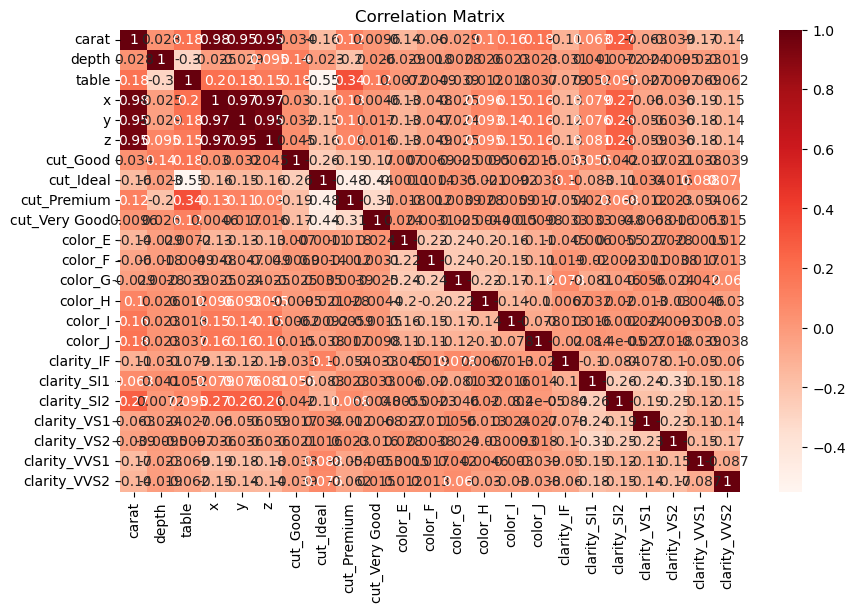

Data after dropping highly correlated features
       carat  depth  table  cut_Good  cut_Ideal  cut_Premium  cut_Very Good  \
0       0.23   61.5   55.0     False       True        False          False   
1       0.21   59.8   61.0     False      False         True          False   
2       0.23   56.9   65.0      True      False        False          False   
3       0.29   62.4   58.0     False      False         True          False   
4       0.31   63.3   58.0      True      False        False          False   
...      ...    ...    ...       ...        ...          ...            ...   
53935   0.72   60.8   57.0     False       True        False          False   
53936   0.72   63.1   55.0      True      False        False          False   
53937   0.70   62.8   60.0     False      False        False           True   
53938   0.86   61.0   58.0     False      False         True          False   
53939   0.75   62.2   55.0     False       True        False          False   

    

'correlation_matrix = price_df_encode.corr(method=\'pearson\')\nplt.figure(figsize=(15,11))\nsns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=\'.2f\', linewidth=0.5)\nplt.matshow(correlation_matrix, cmap=\'coolwarm\', fignum=1)\nplt.colorbar()\nplt.title("Correlation Matrix")\nplt.show()\n\nhigh_correlation = set()\nthreshold = 0.9\nfor i in range(len(correlation_matrix.columns)):\n    for j in range(i):\n        if abs(correlation_matrix.iloc[i, j])>=threshold:\n            column = correlation_matrix.columns[i]\n            #column2 = correlation_matrix.columns[j]\n            high_correlation.add(column)\nprint("High correlation features: ")\nprint(high_correlation)\n\n#for column1, column2 in high_correlation:\n #   if column1 in price_df_encode.columns:\nprice_df_encode.drop(columns=high_correlation, inplace=True)\n\nprint("\nUpdated dataframe shape:", price_df_encode.shape)\nprint(f"Dropped features: {high_correlation}")\n\nprint(price_df_encode.columns)'

In [42]:
### Code here
#print(price_df_encode.shape)
#print(price_df_encode.columns)

#finding the correlation matrix
corr_matrix = one_hot_encoded_df.corr()
#Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.title("Correlation Matrix")
plt.show()

#setting threshold value
threshold = 0.9
high_corr=[]

# Find pairs of features with correlation greater than the threshold
for i in range(len(corr_matrix.columns)):
    for j in range(i):
    #checking if the value is greater than or equal to threshold
        if abs(corr_matrix.iloc[i, j]) >= threshold:
            high_corr.append(corr_matrix.columns[i])
            
#drop the feature that has high value
df_dropped = one_hot_encoded_df.drop(columns=high_corr)
print("Data after dropping highly correlated features")
print(df_dropped)

### Comment here
We are checking for correlation and dropping one of the features with high correlation with another feature because 
having features that are highly correlated can cause the data to overfit and increase redundancy in the data.

**2.1.3 Split the dataset into training (60%), validation (20%), and test (20%) sets. Print the dimensions of the datasets as well.**

In [47]:
df_dropped.shape

(53940, 20)

In [48]:
price_y.shape

(53940,)

In [62]:
### Code here

# First split: 60% training, 40% remaining (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(df_dropped, price_y, test_size=0.4, random_state=42)

# Second split: 50% validation, 50% test from the remaining 40% (20% each of total dataset)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

price_y_train = y_train
price_y_val = y_val
price_y_test = y_test

# Print the shapes of the datasets
X_train.shape, price_y_train.shape, X_val.shape, price_y_val.shape, X_test.shape, price_y_test.shape


((32364, 20), (32364,), (10788, 20), (10788,), (10788, 20), (10788,))

**2.1.4 Standardize the columns in the feature matrices.**

In [66]:
### Code here

scaler = StandardScaler()
price_X_train = scaler.fit_transform(X_train)
#using the same scaler to fit the val and test data
price_X_val =scaler.transform(X_val)
price_X_test=scaler.transform(X_test)



In [67]:
# Uncomment the following lines to add a column of ones to include the bias term

price_X_train = np.hstack([np.ones((price_X_train.shape[0], 1)), price_X_train])
price_X_val = np.hstack([np.ones((price_X_val.shape[0], 1)), price_X_val])
price_X_test = np.hstack([np.ones((price_X_test.shape[0], 1)), price_X_test])

In [68]:
price_X_train.shape

(32364, 21)

At the end of this pre-processing, you should have the following vectors and matrices:

- **price_X_train**: Training set feature matrix.
- **price_X_val**: Validation set feature matrix.
- **price_X_test**: Test set feature matrix.
- **price_y_train**: Training set labels (prices).
- **price_y_val**: Validation set labels.
- **price_y_test**: Test set labels.


### Implement Linear Regression

Now that the data is preprocessed, we can implement a linear regression model, specifically Ridge Regression, which incorporates L2 regularization.

Given a feature matrix \( X \), a label vector \( y \), and a weight vector \( w \), the hypothesis function for linear regression is:

$$
y = X w
$$

The objective is to find the optimal weight vector \( w \) that minimizes the following loss function:



$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

Where:
-  $\| X w - y \|^2_2$ penalizes predictions that differ from actual labels.
- $\alpha \| w \|^2_2$ is the regularization term, helping reduce overfitting by penalizing large weights.
-  $\alpha$ is the regularization parameter.

The closed-form solution for Ridge Regression is given by the Normal Equations:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$



**2.1.5 Implement a `LinearRegression` class with `train` and `predict` methods**

We will now implement a custom `LinearRegression` class with L2 regularization (Ridge Regression).

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [73]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution.
        Parameters:
        X : (m x n) feature matrix
        y: (m x 1) label vector
        '''
        ### Your code here
        dim=X.shape[1]
        I =np.eye(dim)
        I[0, 0] = 0
        #solving 𝑤=(𝑋^𝑇.𝑋+𝛼𝐼)^(−1). 𝑋^𝑇. 𝑦
        self.w=np.linalg.solve(X.T @ X + self.alpha * I, X.T @ y)
        

    def predict(self, X):
        '''Predicts on X using trained model.
        Parameters:
        X : (m x n) feature matrix
        Returns:
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        y_pred = X @ self.w
        return y_pred

**2.1.6 Train, Evaluate, and Interpret Linear Regression Model**

**Train a linear regression model ($\alpha = 0$) on the price dataset. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**


In [74]:
model = LinearRegression(alpha=0)
print(price_X_train)
print(price_y_train)
print("END")
price_X_train = price_X_train.astype(np.float64)
price_y_train = price_y_train.astype(np.float64)
#model.train(price_X_train, price_y_train)

model.train(X_train_scaler, price_y_train)
#price_y_train_pred = model.predict(price_X_train)
#price_y_val_pred = model.predict(price_X_val)
#price_y_test_pred = model.predict(price_X_test)

price_y_train_pred = model.predict(X_train_scaler)
price_y_val_pred = model.predict(X_val_scaler)
price_y_test_pred = model.predict(X_test_scaler)

train_score = r2_score(price_y_train, price_y_train_pred)
val_score = r2_score(price_y_val, price_y_val_pred)
test_score = r2_score(price_y_test, price_y_test_pred)

print(f"Training score: {train_score:.4f}")
print(f"Validation score: {val_score:.4f}")
print(f"Testing score: {test_score:.4f}")

print(price_y_test_pred)
print("------------------------------------------------------")
print(price_y_test)

y_test_pred = price_y_test_pred.flatten()
print("\nFirst 3 Predictions vs Actual:")
for i in range(3):
    print(f"Predicted: {price_y_test_pred[i]:.4f}, Actual: {price_y_test.iloc[i]:.4f}")

print("\nLast 3 Predictions vs Actual:")
for i in range(-3, 0):
    print(f"Predicted: {price_y_test_pred[i]:.4f}, Actual: {price_y_test.iloc[i]}")

[[ 1.          2.55223634  2.1330862  ... -0.54316315 -0.27039324
  -0.32086556]
 [ 1.          0.44568494  0.10751607 ... -0.54316315 -0.27039324
   3.11657006]
 [ 1.         -0.86037693 -0.10202567 ... -0.54316315 -0.27039324
   3.11657006]
 ...
 [ 1.         -0.98677002 -1.01003987 ... -0.54316315 -0.27039324
  -0.32086556]
 [ 1.          0.21396428  0.73614128 ... -0.54316315 -0.27039324
  -0.32086556]
 [ 1.          0.71953662 -0.94019262 ... -0.54316315 -0.27039324
  -0.32086556]]
26577    16287
15931     6371
37542      988
27267    17694
15568     6244
         ...  
11284     4975
44732     1617
38158     1014
860       2871
15795     6320
Name: price, Length: 32364, dtype: int64
END
Training score: -0.0533
Validation score: -0.0730
Testing score: -0.0404
[ 1762.03877255 -2511.84365132  -908.53705218 ... -4095.26630928
 -1384.87192858 -3397.82879423]
------------------------------------------------------
11210    4959
36392     942
50388    2251
31724     772
18938    7785
   

In [75]:
def get_report(y_pred, y_test):
    """
    Report the first 3 and last 3 predictions on X_test,
    along with the actual labels in y_test.

    Returns:
        A dataframe with 6 rows comparing predictions and actuals.
    """
    
    preds = np.concatenate([y_pred[:3], y_pred[-3:]])
    actuals = np.concatenate([y_test[:3], y_test[-3:]])
    df_compare = pd.DataFrame({'Prediction': preds,'Actual': actuals})
    df_compare['Position'] = [1, 2, 3, len(y_pred) - 2, len(y_pred) - 1, len(y_pred)]
    df_compare = df_compare.set_index('Position')
    return df_compare

In [76]:
### Code here

#creating an object of the created class with alpha default set to 0
lin_model =LinearRegression(alpha=0)
#calling the train() function on X_train and y_train
lin_model.train(price_X_train,price_y_train)
#R2 score on training data
y_train_pred = lin_model.predict(price_X_train)
print("R2 score on training data is: ", r2_score(price_y_train,y_train_pred))
#R2 score on Validation data
y_val_pred = lin_model.predict(price_X_val)
print("R2 score on validation data is: ", r2_score(price_y_val,y_val_pred))
#R2 score on testing data
y_test_pred = lin_model.predict(price_X_test)
print("R2 score on testing data is: ", r2_score(price_y_test,y_val_pred))
#getting report on first 3 and last 3 predictions
y_pred=np.append(y_test_pred[:3],y_test_pred[-3:])
y_test=np.append(price_y_test[:3],price_y_test[-3:])
# print(y_test)
print("###################################################")
df_compare= get_report(y_pred,y_test)
print(df_compare)

R2 score on training data is:  0.9157166535571568
R2 score on validation data is:  0.9142271542594652
R2 score on testing data is:  -0.8916397633650732
###################################################
           Prediction  Actual
Position                     
1         5919.595961    4959
2         1246.597241     942
3         3225.375401    2251
4         -115.121439     775
5         2840.098186    2834
6          610.410654     805


**2.1.7 Use the mean of the training labels (price_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.**

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [77]:
### Code here
#from sklearn.metrics import r2_score

#calculating the mean
mean_y_train = np.mean(price_y_train)
#creating the train, val, test predictions as the mean of training labels
y_train_pred_baseline = np.full(price_y_train.shape, mean_y_train)
y_val_pred_baseline = np.full(price_y_val.shape, mean_y_train)
y_test_pred_baseline = np.full(price_y_test.shape, mean_y_train)

#R2 score on training data
y_train_pred = lin_model.predict(price_X_train)
print("R2 score on training data is: ", r2_score(price_y_train,y_train_pred_baseline))
#R2 score on Validation data
y_val_pred = lin_model.predict(price_X_val)
print("R2 score on validation data is: ", r2_score(price_y_val,y_val_pred_baseline))
#R2 score on testing data
y_test_pred = lin_model.predict(price_X_test)
print("R2 score on testing data is: ", r2_score(price_y_test,y_test_pred_baseline))
print('###############################################################')
if r2_score(price_y_train,y_train_pred_baseline) < r2_score(price_y_train,y_train_pred):
    print("Train: Higher than baseline")
else:
    print("Lower on train")
if r2_score(price_y_val,y_val_pred_baseline) < r2_score(price_y_val,y_val_pred):
    print("Validaton: Higher than baseline")
else:
    print("Lower on validation")
if r2_score(price_y_test,y_test_pred_baseline) < r2_score(price_y_test,y_test_pred):
    print("Testing: Higher than baseline")
else:
    print("Lower on testing")
print('###############################################################')


R2 score on training data is:  0.0
R2 score on validation data is:  -1.758583505329092e-05
R2 score on testing data is:  -3.410106148660219e-05
###############################################################
Train: Higher than baseline
Validaton: Higher than baseline
Testing: Higher than baseline
###############################################################


**2.1.8 Interpret your model trained on the price dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

The weights: [3940.7920529  4216.31047283  -30.04218267  -61.16950277  179.51242242
  428.32214557  348.69360979  328.01883284  -89.39283955 -120.13865985
 -215.50956926 -362.56529421 -432.52309594 -515.98333657  979.54561179
 1550.49576634 1005.09177661 1633.95578642 1780.81488649 1286.36804352
 1454.62763552]
The bias term 3940.7920528982827


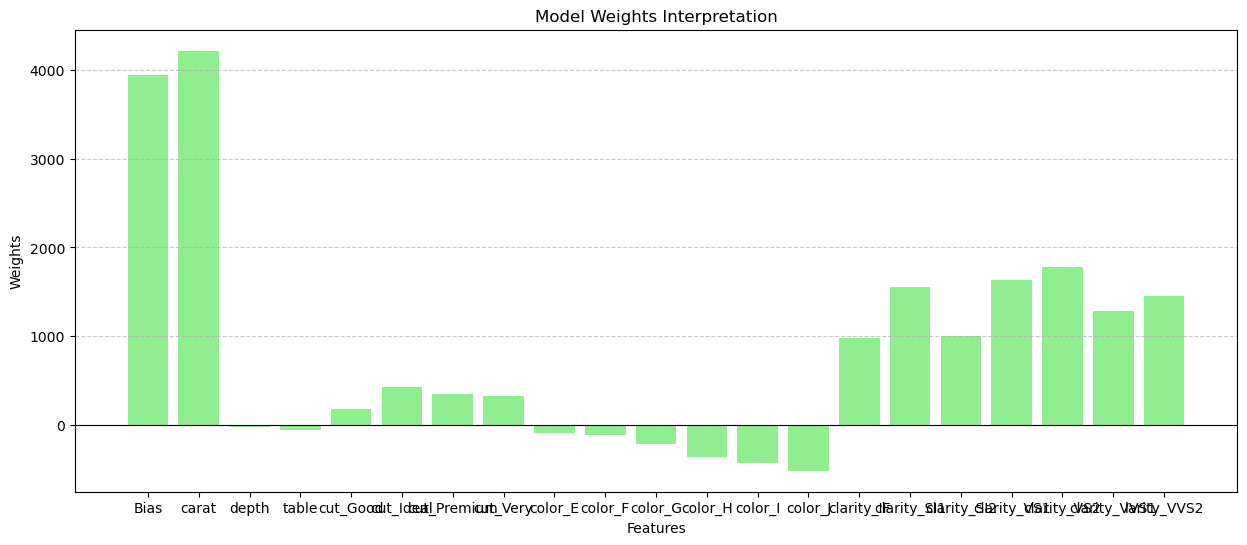

'model = LinearRegression()\n\n# Fit the model to your training data\nmodel.fit(price_X_train, price_y_train)\n\n# Check if the model is properly trained\nif hasattr(model, \'coef_\') and hasattr(model, \'intercept_\'):\n    # Step 1: Extract model coefficients (weights) and bias term\n    weights = model.coef_  # Coefficients for each feature\n    bias = model.intercept_  # Bias term\n\n    # Step 2: Prepare feature names (for labeling the x-axis)\n    feature_names = [\'Feature1\', \'Feature2\', \'Feature3\']  # Replace with actual feature names\n\n    # Step 3: Create a bar chart\n    plt.figure(figsize=(10, 6))\n    plt.bar(feature_names, weights, color=\'blue\', label=\'Feature Weights\')\n    plt.axhline(0, color=\'black\',linewidth=1)  # Add a line at y=0 for better visual comparison\n\n    # Add the bias term as a separate bar\n    plt.bar(\'Bias\', bias, color=\'red\', label=\'Bias Term\')\n\n    # Step 4: Label the axes and the title\n    plt.xlabel(\'Features\')\n    plt.yla

In [79]:
### Code here

bias_weights = lin_model.w.flatten()  # Convert weights to a 1D array
bias = bias_weights[0]  # The bias term is the first weight (intercept)
print("The weights:",bias_weights)
print("The bias term",bias)

feature_names = ['Bias'] + ['carat','depth','table','cut_Good','cut_Ideal','cut_Premium','cut_Very','color_E','color_F','color_G','color_H',
                           'color_I','color_J','clarity_IF','clarity_SI1','clarity_SI2','clarity_VS1',
                           'clarity_VS2','clarity_VVS1','larity_VVS2']

plt.figure(figsize=(15, 6))
plt.bar(feature_names, bias_weights, color='lightgreen')
plt.title('Model Weights Interpretation')
plt.xlabel('Features')
plt.ylabel('Weights')
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**2.1.9 According to your model, which features are the greatest contributors to determine the price?**

### Comment here
Here the carat feature contributes the most to the model's decision. 
It is followed by the clarity_VS2, then features clarity_VS1 and clarity_SI1.

**Hyperparameter Tuning ($\alpha$)**

Now, let's tune the $\alpha$ regularization parameter for ridge regression on the price dataset.

**2.1.10 Sweep out values for $\alpha$ using `alphas = np.logspace(-5, 1, 20)`. Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. Plot the results with a log scale for $\alpha$.**

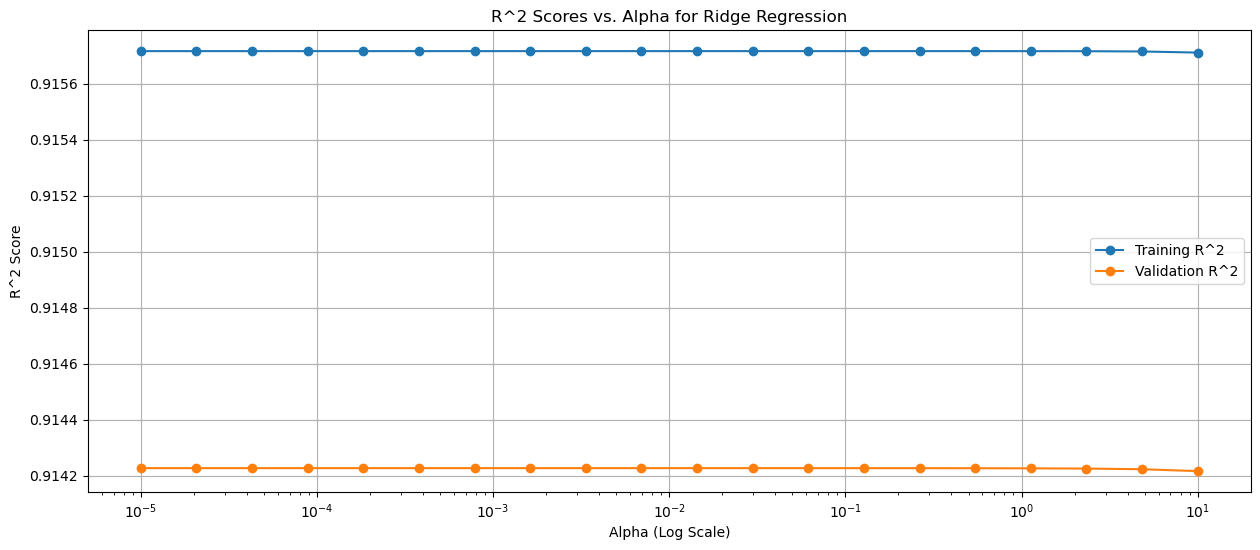

In [81]:
### Code here
alphas = np.logspace(-5, 1, 20)
train_r2_scores = []
val_r2_scores = []

for a in alphas:
    model = LinearRegression(alpha=a)
    model.train(price_X_train, price_y_train)

    y_train_pred = model.predict(price_X_train)
    y_val_pred = model.predict(price_X_val)

    train_r2 = r2_score(price_y_train, y_train_pred)
    val_r2 = r2_score(price_y_val, y_val_pred)

    train_r2_scores.append(train_r2)
    val_r2_scores.append(val_r2)

plt.figure(figsize=(15, 6))
plt.plot(alphas, train_r2_scores, label='Training R^2', marker='o')
plt.plot(alphas, val_r2_scores, label='Validation R^2', marker='o')
plt.xscale('log')
plt.title('R^2 Scores vs. Alpha for Ridge Regression')
#x-axis to log scale
plt.xlabel('Alpha (Log Scale)')
plt.ylabel('R^2 Score')
plt.legend()
plt.grid(True)
plt.show()

**2.1.11 Explain your plot above. How do training and validation $R^2$ behave with increasing $\alpha$?**

### Comment here
Training R^2 shows a slight drop at higher values of alpha (we can see this at the last and last but one point in the graph).<br>
The same case happens with Testing R^2.

## 2.2 Logistic Regression

###**Social Network Ads Dataset Description**

This dataset contains information on user demographics and their purchasing behavior based on social network advertisements. It consists of 5 features, with Purchased (0 = No, 1 = Yes) as the target variable for classification tasks.

####**Key Features:**

User ID: Unique identifier for each user.

Gender: Gender of the user (Male, Female).

Age: Age of the user (ranging from 18 to 60).

EstimatedSalary: User’s estimated annual salary in USD (ranging from 15,000 to 150,000).

Purchased: Indicates whether the user made a purchase after seeing an ad (0 = No, 1 = Yes).

**2.2.1 Load the dataset, the dataset to be used is ads.csv**

In [14]:
### Code here
ads_df = pd.read_csv("ads.csv")
ads_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
#Uncomment the following line

ads_df = ads_df.drop(columns=['User ID'])
ads_df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


**2.2.2 Are there any missing values in the dataset?**

In [16]:
### Code here
missing_values = ads_df.isnull().sum()
print("The missing values are: ")
print(missing_values)

The missing values are: 
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [17]:
### Comment here
column_dtypes = ads_df.dtypes
print("The data type of columns are:")
print(column_dtypes)

The data type of columns are:
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object


**2.2.3 Encode the categorical variables. What is the best way to encode and why?**

In [18]:
### Code here
#one hot encoding the categorical data
ads_one_hot_encoded_df = pd.get_dummies (ads_df , columns = ['Gender'],drop_first=True)
print("After encoding categorical data")
ads_one_hot_encoded_df.head()

After encoding categorical data


,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False
3,27,57000,0,False
4,19,76000,0,True


OneHotEncoding is better because of the categorical data Gender (Male or Female). Since there are only 2 categories OneHotEncoding seemed better.

In [19]:
### Comment here
ads_one_hot_encoded_df.shape

(400, 4)

**2.2.4 Do you think that the distribution of labels is balanced? Why/why not? Hint: Find the probability of the different categories.**

In [20]:
### Code here

total_no_rows= ads_one_hot_encoded_df.shape[0]
no_of_yes = ads_one_hot_encoded_df[ads_one_hot_encoded_df['Purchased']==1].shape[0]
print("Number of Samples with have a Purcased = Y(1)",no_of_yes)
no_of_no = ads_one_hot_encoded_df[ads_one_hot_encoded_df['Purchased']==0].shape[0]
print("Number of Samples with have a Purchased = N(0)",no_of_no)

#probability of different categories
#probabilty of Y
prob_Y= no_of_yes/total_no_rows
prob_N= no_of_no/total_no_rows
print()
print("Probabilty of Purchased=Y ",prob_Y)
print("Probabilty of Purchased=N ",prob_N)

Number of Samples with have a Purcased = Y(1) 143
Number of Samples with have a Purchased = N(0) 257

Probabilty of Purchased=Y  0.3575
Probabilty of Purchased=N  0.6425


### Comment here
The data is not balanced, because the occurrences of purchases with a value=Y is almost half of that of the purchases with a value=N. Unbalanced data can cause bias in the model prediction.


**2.2.5 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

In [21]:
### Code here
#separating X and Y
#X_ads= ads_one_hot_encoded_df.drop(columns=['Gender_Male'])
#y_ads = ads_one_hot_encoded_df['Gender_Male']

X_ads= ads_one_hot_encoded_df.drop(columns=['Purchased'])
y_ads = ads_one_hot_encoded_df['Purchased']
X_ads.head ()

,Age,EstimatedSalary,Gender_Male
0,19,19000,True
1,35,20000,True
2,26,43000,False
3,27,57000,False
4,19,76000,True


In [22]:
### Code here
X_ads.shape,y_ads.shape

((400, 3), (400,))

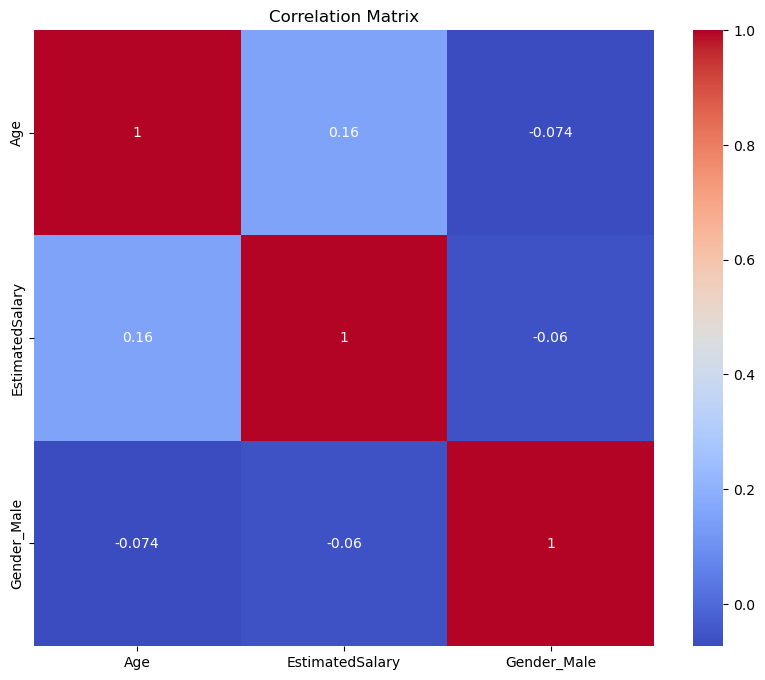

In [23]:
### Comment here
#correlation matrix
ads_correlation_matrix = X_ads.corr()

#plotting correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(ads_correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [25]:
threshold_ads =0.9

high_corr_features_ads=[]
# Find pairs of features with correlation greater than the threshold
for i in range(len(ads_correlation_matrix.columns)):
    for j in range(i):
        #checking if the value is greater than or equalto threshold
        if abs(ads_correlation_matrix.iloc[i, j]) >= threshold_ads:
            high_corr_features_ads.append(corr_matrix.columns[i])

#drop the feature that has high value
print("The columns dropped ", high_corr_features_ads)
ads_df_dropped = X_ads.drop(columns=high_corr_features_ads)
print("Data after dropping highly correlated features")
ads_df_dropped.head()

The columns dropped  []
Data after dropping highly correlated features


,Age,EstimatedSalary,Gender_Male
0,19,19000,True
1,35,20000,True
2,26,43000,False
3,27,57000,False
4,19,76000,True


**2.2.6 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [26]:
### Code here
#1. convert the label to mX1 numpy vector
y_reshaped = y_ads.values.reshape(-1, 1)
y_reshaped.size

400

In [27]:
#2. Splitting the data into train, val, test sets
X_train, X_test, y_train, y_test = train_test_split(ads_df_dropped, y_reshaped, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [28]:
#check the shape
X_train.shape,X_val.shape,X_test.shape

((240, 3), (80, 3), (80, 3))

In [29]:
X_train.head()

,Age,EstimatedSalary,Gender_Male
395,46,41000,False
249,35,97000,False
150,26,15000,False
359,42,54000,True
323,48,30000,False


In [30]:
# 3. Standarizing
scaler_ads = StandardScaler()
ads_X_train = scaler_ads.fit_transform(X_train)
#using the same scaler to fit the val and test data
ads_X_val =scaler_ads.transform(X_val)
ads_X_test=scaler_ads.transform(X_test)
ads_X_train.shape

(240, 3)

In [31]:
ads_y_train=y_train
ads_y_val =y_val
ads_y_test=y_test

In [32]:
#creating the bias term
ads_X_train = np.hstack([np.ones((ads_X_train.shape[0], 1)), ads_X_train])
ads_X_val = np.hstack([np.ones((ads_X_val.shape[0], 1)), ads_X_val])
ads_X_test = np.hstack([np.ones((ads_X_test.shape[0], 1)), ads_X_test])

In [33]:
#checking the shape
ads_X_train.shape

(240, 4)

### Implement Logisitc Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
>
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [34]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''

    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent
        (sets w to its optimal value).

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''

        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t):
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss

    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold
        the predicted probability to return a 0 or 1 prediction.

        Parameters
        ----------
        X : (m x n) feature matrix

        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred

    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w,
        and alpha. Useful as a helper function for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2

    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss
        using X, y, w, and alpha. Useful as a helper function
        for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w


    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x.
        Useful as a helper function for predict(), calculate_loss(),
        and calculate_gradient().

        Parameters
        ----------
        x: (m x 1) vector

        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.7 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

i) Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the loan training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.

ii) Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

iii) Compare accuracy on the test dataset for both the scenarios.

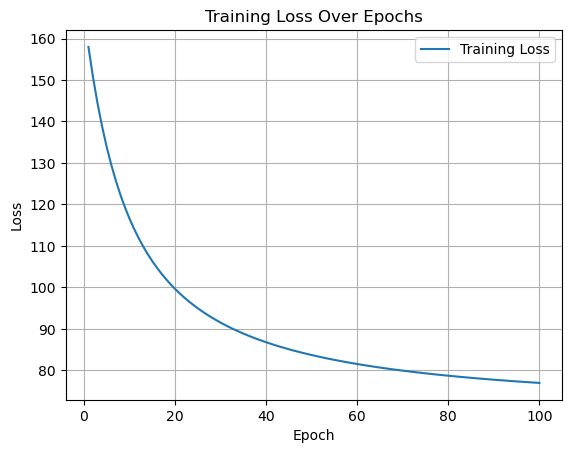

In [35]:
### Code here
log_model = LogisticRegression(alpha=0, t=100, eta=1e-3)
loss= log_model.train(ads_X_train,ads_y_train)

#squeeze to 1 dim
loss_squeezed = np.squeeze(loss)

#plotting the training loss over epochs
plt.plot(range(1, len(loss) + 1), loss_squeezed, label="Training Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
### Code here
#2.  Selecting the best hyperparameters
from sklearn.metrics import accuracy_score
new_best_acc = 0

#best hyperparameters
new_alpha=0
new_t=0
new_eta=0

#go over 20 times
for i in range(20):

    #using .random to get random values within the given range
    alpha = np.random.uniform(0, 1)
    t = np.random.randint(1, 101)
    eta = np.random.uniform(0, 0.001)


    # Train the model with sampled hyperparameters
    model = LogisticRegression(alpha=alpha, t=t, eta=eta)
    model.train(ads_X_train, ads_y_train)

    # use the validation to get pred_values
    y_pred = model.predict(ads_X_val)

    # Calculate the accuracy
    accuracy = accuracy_score(ads_y_val, y_pred)

    # Check if the new accuracy is better than the previous
    if accuracy > new_best_acc:
        new_best_acc = accuracy
        new_alpha = alpha
        new_t=t
        new_eta=eta
print("The best value of alpha: ",new_alpha)
print("The best value of t: ",new_t)
print("The best value of eta: ",new_eta)

The best value of alpha:  0.7645306286495899
The best value of t:  87
The best value of eta:  5.100788792521372e-05


In [37]:
### Code here
#3. Compare the accuracy

#previously given values of alpha, eta, and t
log_model1 = LogisticRegression(alpha=0, t=100, eta=1e-3)
loss= log_model1.train(ads_X_train,ads_y_train)
ads_y_pred1 = log_model1.predict(ads_X_test)

model1_accuracy = accuracy_score(ads_y_test,ads_y_pred1,)

#new values of alpha, eta, and t
log_model2 = LogisticRegression(alpha=new_alpha, t=new_t, eta=new_eta)
loss= log_model2.train(ads_X_train,ads_y_train)
ads_y_pred2 = log_model2.predict(ads_X_test)

model2_accuracy = accuracy_score(ads_y_test,ads_y_pred2)

print("The accuracy with the original hyperparamters are: ", model1_accuracy)
print("The accuracy with the new hyperparamters are: ", model2_accuracy)

The accuracy with the original hyperparamters are:  0.85
The accuracy with the new hyperparamters are:  0.8375


In [38]:
### Code here


### Feature Importance

**2.2.8 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

The weights: [-1.08621291  1.84181253  1.00447684 -0.1118729 ]
The bias term -1.086212909001669


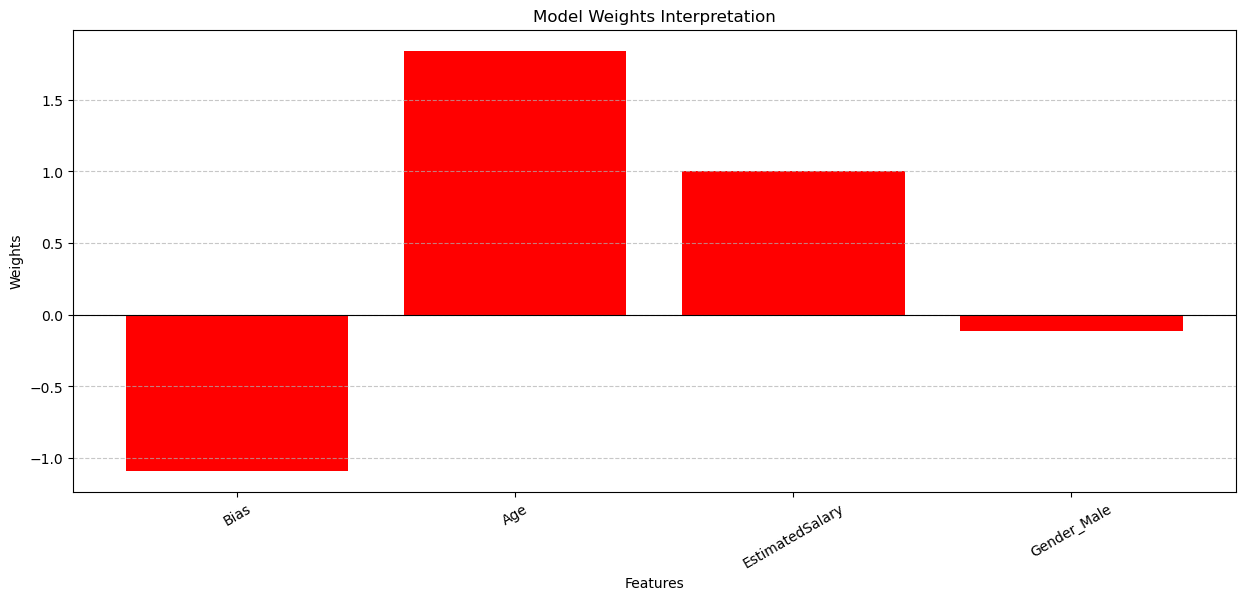

In [43]:
### Code here
#get the bias and weights

bias_weights_ads = log_model1.w.flatten()
bias = bias_weights_ads[0]
print("The weights:",bias_weights_ads)
print("The bias term",bias)

ads_feature_names = ['Bias'] + ['Age','EstimatedSalary','Gender_Male']
plt.figure(figsize=(15, 6))
plt.bar(ads_feature_names, bias_weights_ads, color='red')
plt.title('Model Weights Interpretation')
plt.xticks(rotation=30)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Comment here
From the above plot, Age has the highest weight value, followed by Estimated Salary. 
The plot shows that these terms contribute the most to the Linear Regression algorithm and the model's prediction.

### 2.3 Support Vector Machines

In this part, we will be using support vector machines for classification on the loan dataset.

### Train Primal SVM
**2.3.1 Train a primal SVM (with default parameters) on the ads dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [45]:
### Code here
#training the linear/primal SVC on the training set
svc_primal = LinearSVC()
svc_primal.fit(ads_X_train,ads_y_train.ravel())

#accuracy score on the training set
svc_primal_pred_train = svc_primal.predict(ads_X_train)
acc_svc_primal_train = accuracy_score(ads_y_train,svc_primal_pred_train)

#accuracy score on the validation set
svc_primal_pred_val = svc_primal.predict(ads_X_val)
acc_svc_primal_val = accuracy_score(ads_y_val,svc_primal_pred_val)

#accuracy score on the test set
svc_primal_pred_test = svc_primal.predict(ads_X_test)
acc_svc_primal_test = accuracy_score(ads_y_test,svc_primal_pred_test)

print("The accuracy score on the predictions made on the training set is: ", acc_svc_primal_train)
print("the accuracy score on the predictions made on the validation set is: ",acc_svc_primal_val)
print("The accuracy score on the prediction made on the test set is: ", acc_svc_primal_test )

The accuracy score on the predictions made on the training set is:  0.8541666666666666
the accuracy score on the predictions made on the validation set is:  0.8125
The accuracy score on the prediction made on the test set is:  0.85


### Train Dual SVM
**2.3.2 Train a dual SVM (with default parameters) on the ads dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [46]:
### Code here
svc_dual = SVC(kernel='rbf')
svc_dual.fit(ads_X_train,ads_y_train)

#accuracy score on the training set
svc_dual_pred_train = svc_dual.predict(ads_X_train)
acc_svc_primal_train = accuracy_score(ads_y_train,svc_primal_pred_train.ravel())

#accuracy score on the validation set
svc_dual_pred_val = svc_dual.predict(ads_X_val)
acc_svc_dual_val = accuracy_score(ads_y_val,svc_dual_pred_val)

#accuracy score on the test set
svc_dual_pred_test = svc_dual.predict(ads_X_test)
acc_svc_dual_test = accuracy_score(ads_y_test,svc_dual_pred_test)

print("The accuracy score on the predictions made on the training set is: ", acc_svc_primal_train)
print("the accuracy score on the predictions made on the validation set is: ",acc_svc_primal_val)
print("The accuracy score on the prediction made on the test set is: ", acc_svc_primal_test )

The accuracy score on the predictions made on the training set is:  0.8541666666666666
the accuracy score on the predictions made on the validation set is:  0.8125
The accuracy score on the prediction made on the test set is:  0.85


C:\Users\Siri\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
